In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def quantize(signal, bits, vmin=-1.0, vmax=1.0):
    levels = 2 ** bits
    step = (vmax - vmin) / levels #step = LSB weight (change in 1 bit after the chnage in weight)
    
    quantized = []

    for x in signal:
        code = np.floor((x - vmin) / step)
        x_q = (code + 0.5) * step + vmin
        quantized.append(x_q)
    return np.array(quantized)

In [10]:
def plot_function(t, q_signal, bits):
    plt.plot(t, q_signal, label=f"{bits}-bit Quantized")

# Plot original analog signal
    plt.plot(t, analog_signal_sin, 'k--', linewidth=2, label="Original Signal")

    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.title("ADC Quantization of a Sine Wave at Different Bit Depths")
    plt.legend()
    plt.grid(True)
    plt.show()

In [11]:
def display_binary_output(q_signal, LSB_weight, bits):
    output = []
    Amp_min = min(q_signal)
    for index, val in enumerate(q_signal):
        code = int((val - Amp_min)/LSB_weight)
        #     print(val, code)
        output.append(bin(code)[2:])
    binary_output = [f"{int(i, 2):0{bits}b}" for i in output]
    print(binary_output)

In [12]:
def ADC(signal, bits, Vref, t): #A Complte ADC Function, returns Binary code
    q_signal = quantize(signal, bits)
    LSB_weight = Vref/ (2**bits)
    # print(LSB_weight)
    plot_function(t, q_signal, bits)
    display_binary_output(q_signal, LSB_weight, bits)
    

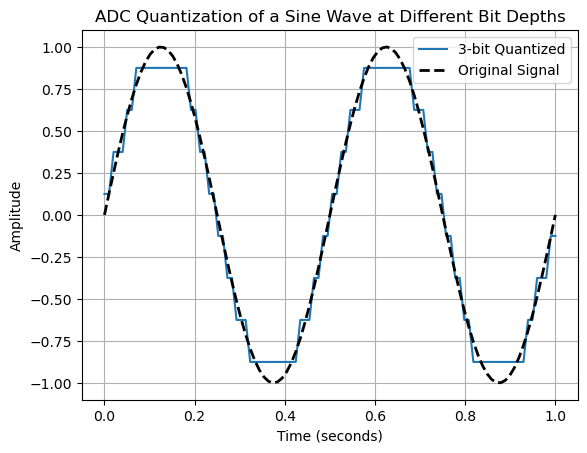

['100', '100', '101', '101', '101', '110', '110', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '110', '110', '101', '101', '100', '100', '011', '011', '010', '010', '001', '001', '001', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '001', '001', '001', '010', '010', '011', '011', '100', '100', '101', '101', '110', '110', '110', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '110', '110', '110', '101', '101', '100', '100', '011', '011', '010', '010', '001', '001', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '001', '001', '010', '010', '010', '011', '011']


In [13]:
# initialization

f_signal = 2         # Signal frequency = 5 Hz
fs = 100           # Sampling rate = 100 samples per second
t = np.linspace(0, 1, fs)   # Time axis: 1 second duration
Vref_max  = 1.0
Vref_min = -1.0
Vref = Vref_max - Vref_min

# Analog signal (what comes from antenna)
analog_signal_sin = np.sin(2 * np.pi * f_signal * t)

bits = 3

q_signal = ADC(analog_signal_sin, bits, Vref, t)